In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

In [2]:
data = pd.read_csv('gbm-data.csv')
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = data.iloc[:, 0].values
X = data.iloc[:, 1:].values

Градиентный бустинг

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.8, random_state=0)
N, M = 5, 250
logloss_train = np.zeros((N, M))
logloss_test = np.zeros((N, M))
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
for i, lr in enumerate(learning_rates):
    print(f'Learning rate = {lr}')
    clf = sklearn.ensemble.GradientBoostingClassifier(n_estimators=250, verbose=True,
                                                      random_state=0, learning_rate=lr)
    clf.fit(X_train, y_train)
    for i_train, y_pred_train in enumerate(clf.staged_predict_proba(X_train)):
        logloss_train[i, i_train] = sklearn.metrics.log_loss(y_train, y_pred_train)
    for i_test, y_pred_test in enumerate(clf.staged_predict_proba(X_test)):
        logloss_test[i, i_test] = sklearn.metrics.log_loss(y_test, y_pred_test)

Learning rate = 1
      Iter       Train Loss   Remaining Time 
         1           1.0596           11.47s
         2           0.9328           11.19s
         3           0.8594           11.32s
         4           0.7911           11.20s
         5           0.7471           11.90s
         6           0.7074           11.89s
         7           0.6608           11.74s
         8           0.6282           11.61s
         9           0.5923           11.45s
        10           0.5548           11.71s
        20           0.2836           11.35s
        30           0.1450           12.43s
        40           0.0957           13.03s
        50           0.0622           13.28s
        60           0.0427           12.33s
        70           0.0297           12.12s
        80           0.0202           11.70s
        90           0.0133           10.65s
       100           0.0094            9.73s
       200           0.0002            3.09s
Learning rate = 0.5
      Iter      

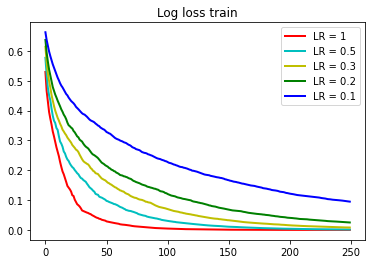

In [12]:
plt.figure()
plt.plot(logloss_train[0], 'r', linewidth=2)
plt.plot(logloss_train[1], 'c', linewidth=2)
plt.plot(logloss_train[2], 'y', linewidth=2)
plt.plot(logloss_train[3], 'g', linewidth=2)
plt.plot(logloss_train[4], 'b', linewidth=2)
plt.legend(['LR = 1', 'LR = 0.5', 'LR = 0.3', 'LR = 0.2', 'LR = 0.1'])
plt.title('Log loss train')
plt.show()

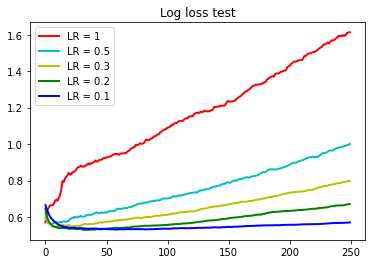

In [13]:
plt.figure()
plt.plot(logloss_test[0], 'r', linewidth=2)
plt.plot(logloss_test[1], 'c', linewidth=2)
plt.plot(logloss_test[2], 'y', linewidth=2)
plt.plot(logloss_test[3], 'g', linewidth=2)
plt.plot(logloss_test[4], 'b', linewidth=2)
plt.legend(['LR = 1', 'LR = 0.5', 'LR = 0.3', 'LR = 0.2', 'LR = 0.1'])
plt.title('Log loss test')
plt.show()

Переобучение на LR = 1

Минимум log loss на тестовой выборке для бустинга при LR = 0.2

In [20]:
opt_loss = np.min(logloss_test[3])
opt_trees = np.argmin(logloss_test[3])
print(f'Min test log loss, gradient boosting = {opt_loss:.4f} on {opt_trees} trees')

Min test log loss, gradient boosting = 0.5290 on 31 trees


Случайный лес из количества деревьев, обеспечивающего минимум log loss для бустинга при LR = 0.2

In [21]:
clf2 = sklearn.ensemble.RandomForestClassifier(n_estimators=opt_trees, random_state=0)
clf2.fit(X_train, y_train)
y_test_pred2 = clf2.predict_proba(X_test)
logloss_test2 = sklearn.metrics.log_loss(y_test, y_test_pred2)
print(f'Test log loss, random forest = {logloss_test2:.4f} on {opt_trees} trees')

Test log loss, random forest = 0.5565 on 31 trees
